In [28]:
#! pip install imbalanced-learn

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv(r'C:\Users\dvale\TFM\Data\all_variables.csv')

In [31]:
print(data.shape)
print(data.columns)

(39852, 19)
Index(['Unnamed: 0', 'id', 'weight', 'material_deprivation', 'sex', 'age',
       'civil_status', 'familial_status', 'region', 'population_density',
       'citizenship', 'tenure_status', 'education_level', 'working_status',
       'working_status_agg', 'occupation', 'economic_sector', 'years_worked',
       'hours_week_worked'],
      dtype='object')


In [32]:
data = data.drop(['Unnamed: 0', 'id', 'weight'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39852 entries, 0 to 39851
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   material_deprivation  39852 non-null  object
 1   sex                   39852 non-null  object
 2   age                   39852 non-null  int64 
 3   civil_status          39852 non-null  object
 4   familial_status       39852 non-null  object
 5   region                39852 non-null  object
 6   population_density    39852 non-null  object
 7   citizenship           39852 non-null  object
 8   tenure_status         39852 non-null  object
 9   education_level       39852 non-null  object
 10  working_status        39852 non-null  object
 11  working_status_agg    39852 non-null  object
 12  occupation            39852 non-null  object
 13  economic_sector       39852 non-null  object
 14  years_worked          39852 non-null  int64 
 15  hours_week_worked     39852 non-null

In [33]:
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Self-employed', 'Minor'], dtype=object)

In [34]:
data.working_status = np.where(data.working_status == 'Self-employed', 'Employed', data.working_status)
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Minor'], dtype=object)

In [35]:
data = data.drop(['working_status_agg'], axis=1)

In [36]:
scaler = StandardScaler()

num_var = data[['age', 'years_worked', 'hours_week_worked']]
scaler.fit(num_var)
scaled_var = pd.DataFrame(scaler.transform(num_var), columns=num_var.columns)

data.age = scaled_var.age
data.years_worked = scaled_var.years_worked
data.years_worked = scaled_var.years_worked

data.head()

,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,economic_sector,years_worked,hours_week_worked
0,No,Male,1.088573,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,Economically inactive/unemployed,1.831752,0
1,No,Female,1.002616,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,Economically inactive/unemployed,-0.922952,0
2,No,Female,1.174531,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,Economically inactive/unemployed,0.178930,0
3,No,Male,0.658786,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,Economically inactive/unemployed,1.097164,0
4,No,Female,0.400914,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,Economically inactive/unemployed,0.791086,0


In [37]:
def get_dummies(df):
    new_df = pd.DataFrame()
    for c in df.columns:
        if type(df[c][0]) == type('string'):
            dummy_df = pd.get_dummies(df[c])
            for dummy_column in dummy_df.columns:
                new_df[c + '_' + dummy_column] = dummy_df[dummy_column]
        else:
            new_df[c] = df[c]
    return new_df

In [38]:
data_final = get_dummies(data[data.columns[1:]])

data_final.head()

,sex_Female,sex_Male,age,civil_status_Divorced,civil_status_Married,civil_status_Married 'de facto',civil_status_Minor,civil_status_Never married,civil_status_Separated,civil_status_Widowed,...,economic_sector_Mining and quarrying,economic_sector_Other service activities,"economic_sector_Professional, scientific and technical activities",economic_sector_Public administration and defence; compulsory social security,economic_sector_Real estate activities,economic_sector_Transportation and storage,"economic_sector_Water supply; sewerage, waste management and remediation activities",economic_sector_Wholesale and retail trade; repair of motor vehicles and motorcycles,years_worked,hours_week_worked
0,0,1,1.088573,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.831752,0
1,1,0,1.002616,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.922952,0
2,1,0,1.174531,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.178930,0
3,0,1,0.658786,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.097164,0
4,1,0,0.400914,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.791086,0


In [39]:
data_final['is_minor'] = data_final.civil_status_Minor
data_final = data_final.drop(['civil_status_Minor', 
                               'working_status_Minor', 
                               'education_level_Minor', 
                               'occupation_Economically inactive', 
                               'economic_sector_Economically inactive/unemployed'], axis=1)

In [40]:
data_final['material_deprivation'] = data.material_deprivation.map({'Yes': 1, 'No': 0})

count_yes = len(data_final[data_final.material_deprivation == 1])
count_no = len(data_final[data_final.material_deprivation == 0])
freq_yes = (count_yes/(count_yes+count_no))*100
freq_no = (count_no/(count_yes+count_no))*100

print('''Has material deprivation: {}%
Does not have material deprivation: {}%'''.format(round(freq_yes, 2), round(freq_no, 2)))

Has material deprivation: 4.61%
Does not have material deprivation: 95.39%


In [41]:
os = SMOTE()

In [42]:
X = data_final.drop(['material_deprivation'], axis=1)
y = data_final.material_deprivation

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=X_train.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['material_deprivation'])

print("Length of oversampled data:", len(os_data_X))
print("Count no in oversampled data:", len(os_data_y[os_data_y.material_deprivation == 0]))
print("Does not have material deprivation in oversampled data:", len(os_data_y[os_data_y.material_deprivation == 1]))

Length of oversampled data: 57068
Count no in oversampled data: 28534
Does not have material deprivation in oversampled data: 28534


In [44]:
logreg = LogisticRegression(max_iter=1000)

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True]
[ 1  1 44  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  3  5  2  4  1  1  1  1  1  1  1  1  1  1 10
  7  8  6 11  9 16 23 24 21 15 22 14 20 38 17 36 39 31 27 18 28 32 29 25
 30 41 34 19 33 12 40 35 13 26 43 37 42 45  1]


In [45]:
selected_columns = [X_train.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i] == True]
selected_columns

['sex_Female',
 'sex_Male',
 'civil_status_Divorced',
 'civil_status_Married',
 "civil_status_Married 'de facto'",
 'civil_status_Never married',
 'civil_status_Separated',
 'civil_status_Widowed',
 'familial_status_No',
 'familial_status_Yes',
 'region_Andalusia',
 'region_Aragon',
 'region_Asturias',
 'region_Balearic Islands',
 'region_Basque Country',
 'region_Canary Islands',
 'region_Cantabria',
 'region_Castile and Leon',
 'region_Castile–La Mancha',
 'region_Catalonia',
 'region_Ceuta',
 'region_Comunity of Madrid',
 'region_Extremadura',
 'region_Galicia',
 'region_La Rioja',
 'region_Melilla',
 'region_Navarre',
 'region_Region of Murcia',
 'region_Valencian Community',
 'population_density_Densely-populated area',
 'population_density_Intermediate area',
 'population_density_Thinly-populated area',
 'tenure_status_Accommodation is provided free',
 'tenure_status_Accommodation is rented at a reduced rate (lower price than the market price)',
 'tenure_status_Outright owner',
 

In [48]:
X_train = os_data_X[selected_columns]
y_train = os_data_y.material_deprivation.ravel()
X_test = X_test[selected_columns]

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [49]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9199  280]
 [ 392   92]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9479
           1       0.25      0.19      0.21       484

    accuracy                           0.93      9963
   macro avg       0.60      0.58      0.59      9963
weighted avg       0.92      0.93      0.93      9963



In [51]:
proba_material_deprivation = [proba[1] for proba in logreg.predict_proba(X_test)]

In [52]:
testing_data = X_test.copy()
testing_data['material_deprivation'] = y_test.copy()
testing_data['proba_material_deprivation'] = proba_material_deprivation

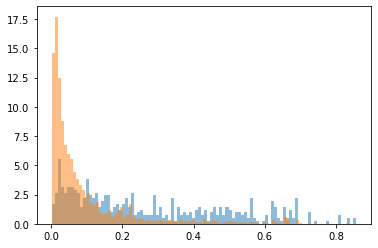

In [53]:
plt.hist(x='proba_material_deprivation', bins=100, data=testing_data[testing_data.material_deprivation == 1].reset_index(), alpha=0.5, density=True)
plt.hist(x='proba_material_deprivation', bins=100, data=testing_data[testing_data.material_deprivation == 0].reset_index(), alpha=0.5, density=True);

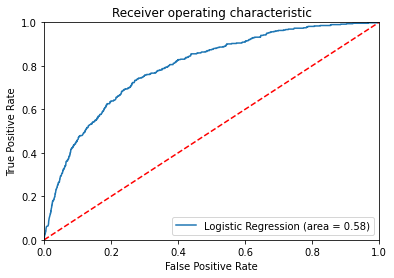

In [54]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right");